In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [108]:
def remove_outliers(group):
    q1 = group['time'].quantile(0.25)
    q3 = group['time'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return group[(group['time'] >= lower_bound) & (group['time'] <= upper_bound)]


In [109]:
df = pd.read_csv('results.csv')
df["instance_size"] = df["file"].str.extract(r"knapPI_\d+_(\d+)_\d+_\d+")
df.describe()

,time,max_value
count,4200.000000,4200.000000
mean,25.107700,71345.833333
std,208.457895,127610.678528
min,0.000045,1487.000000
25%,0.000302,7098.000000
50%,0.015792,18044.500000
75%,1.796882,72505.000000
max,10125.479636,563647.000000


In [110]:
df["instance_size"] = df["instance_size"].astype(int)

df = df.groupby('instance_size').apply(remove_outliers).reset_index(drop=True)
df.describe()

,time,max_value,instance_size
count,4189.000000,4189.000000,4189.000000
mean,18.337285,71132.238243,2673.191693
std,52.097135,127492.864734,3369.252488
min,0.000045,1487.000000,100.000000
25%,0.000302,7098.000000,200.000000
50%,0.005296,18038.000000,1000.000000
75%,1.795819,72505.000000,5000.000000
max,462.201318,563647.000000,10000.000000


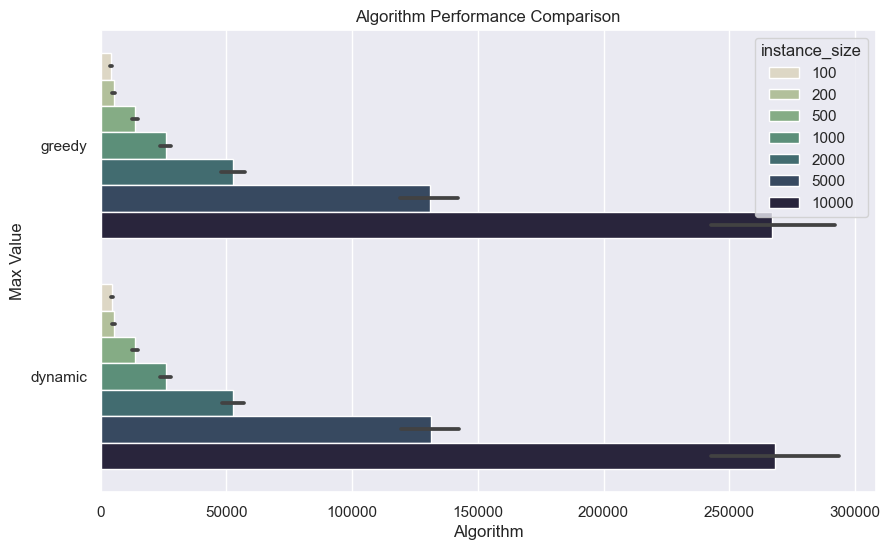

In [111]:
plt.figure(figsize=(10, 6))
# df.boxplot(column="max_value", by="algorithm")
df = df.sort_values(by=['max_value'])
sns.barplot(y="algorithm", x="max_value", data=df, hue="instance_size", \
            palette=sns.color_palette("ch:start=.4,rot=-.8", n_colors=7))
plt.title("Algorithm Performance Comparison")
plt.ylabel("Max Value")
plt.xlabel("Algorithm")
plt.show()

In [112]:
df[df['instance_size'] <= 1000]

,file,algorithm,time,max_value,instance_size
368,knapPI_2_100_1000_1,greedy,0.000047,1487.0,100
236,knapPI_2_100_1000_1,greedy,0.000046,1487.0,100
110,knapPI_2_100_1000_1,greedy,0.000049,1487.0,100
518,knapPI_2_100_1000_1,greedy,0.000045,1487.0,100
242,knapPI_2_100_1000_1,greedy,0.000049,1487.0,100
...,...,...,...,...,...
2143,knapPI_1_1000_1000_1,dynamic,1.916234,54503.0,1000
2017,knapPI_1_1000_1000_1,dynamic,1.782531,54503.0,1000
1843,knapPI_1_1000_1000_1,dynamic,1.826197,54503.0,1000
2077,knapPI_1_1000_1000_1,dynamic,1.784563,54503.0,1000


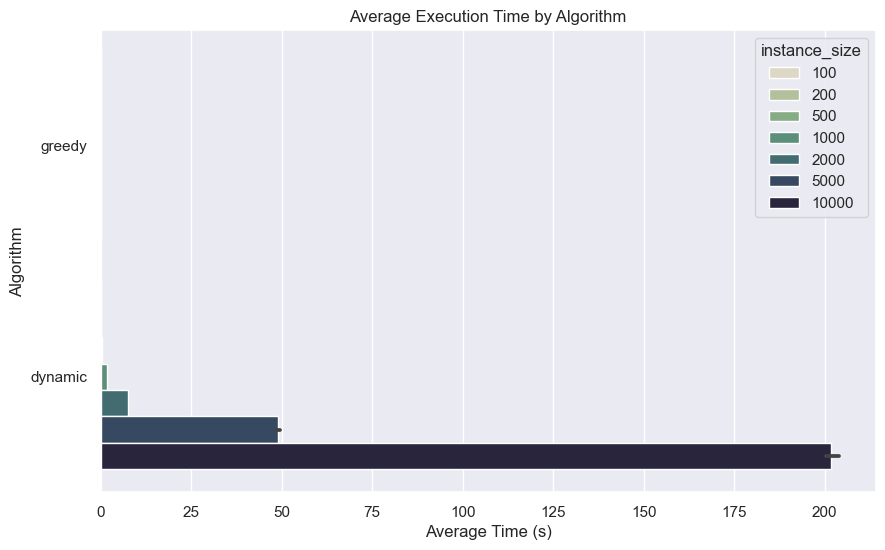

In [113]:
plt.figure(figsize=(10, 6))
sns.barplot(y='algorithm', x="time", data=df, hue=df["instance_size"], \
            palette=sns.color_palette("ch:start=.4,rot=-.8", n_colors=7))
plt.title("Average Execution Time by Algorithm")
plt.ylabel("Algorithm")
plt.xlabel("Average Time (s)")
plt.xticks(rotation=0)
plt.show()

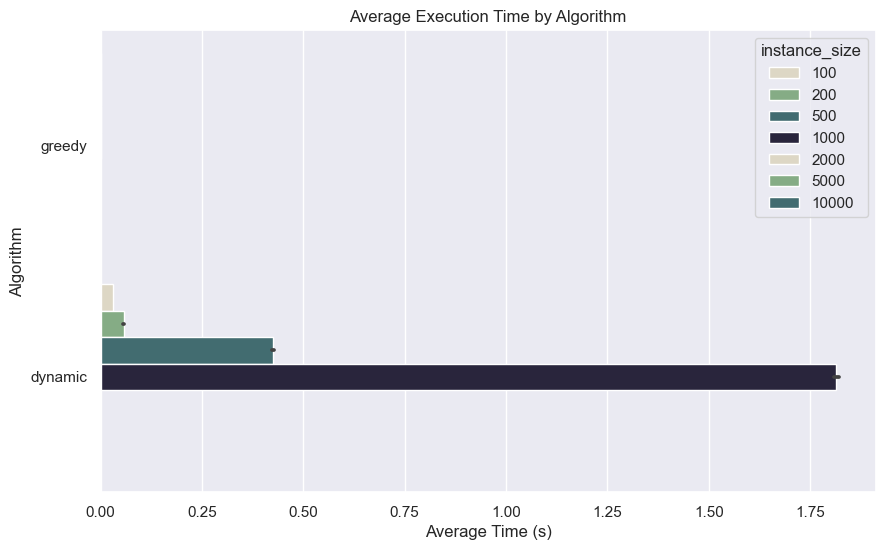

In [114]:
plt.figure(figsize=(10, 6))
sns.barplot(y='algorithm', x="time", data=df[df['instance_size'] <= 1000], hue=df["instance_size"], \
            palette=sns.color_palette("ch:start=.4,rot=-.8", n_colors=4))
plt.title("Average Execution Time by Algorithm")
plt.ylabel("Algorithm")
plt.xlabel("Average Time (s)")
plt.xticks(rotation=0)
plt.show()

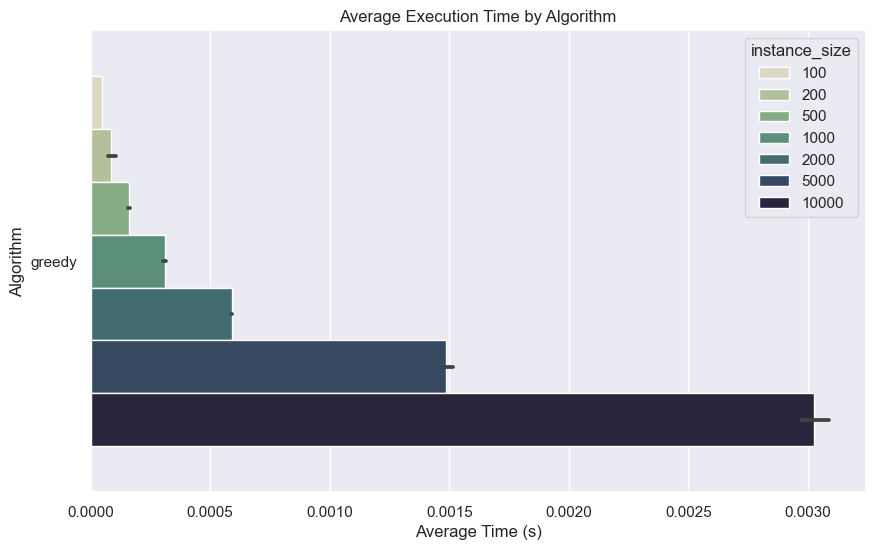

In [115]:
plt.figure(figsize=(10, 6))
filtered_df = df[(df['algorithm'] == 'greedy')]
sns.barplot(y='algorithm', x="time", data=filtered_df, hue="instance_size", \
            palette=sns.color_palette("ch:start=.4,rot=-.8", n_colors=7))
plt.title("Average Execution Time by Algorithm")
plt.ylabel("Algorithm")
plt.xlabel("Average Time (s)")
plt.xticks(rotation=0)
plt.show()

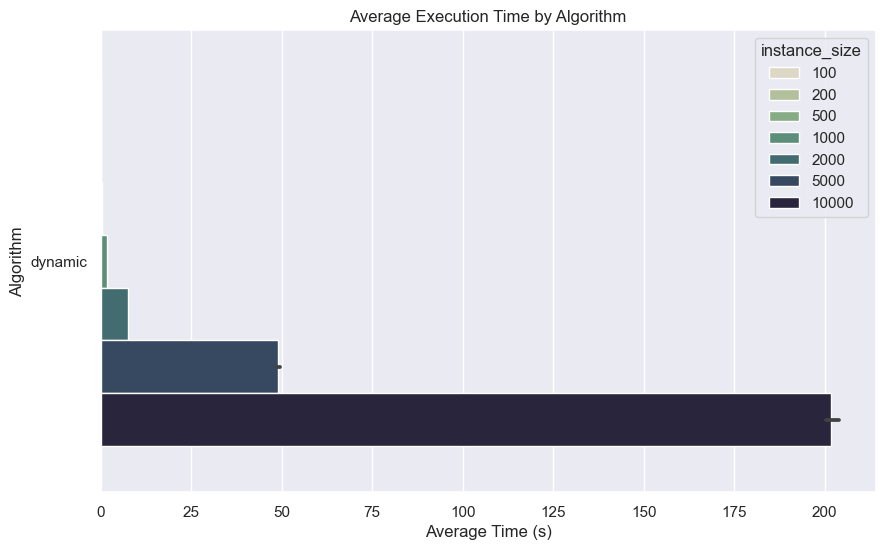

In [116]:
plt.figure(figsize=(10, 6))
filtered_df = df[(df['algorithm'] == 'dynamic')]
sns.barplot(y='algorithm', x="time", data=filtered_df, hue="instance_size", \
            palette=sns.color_palette("ch:start=.4,rot=-.8", n_colors=7))
plt.title("Average Execution Time by Algorithm")
plt.ylabel("Algorithm")
plt.xlabel("Average Time (s)")
plt.xticks(rotation=0)
plt.show()

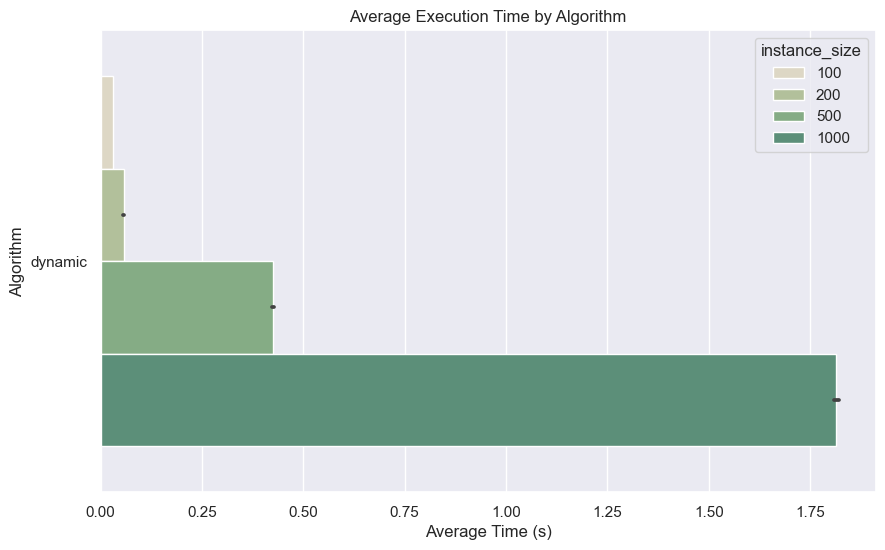

In [117]:
plt.figure(figsize=(10, 6))
filtered_df = df[(df['algorithm'] == 'dynamic') & (df['instance_size'] <= 1000)]
sns.barplot(y='algorithm', x="time", data=filtered_df, hue="instance_size", \
            palette=sns.color_palette("ch:start=.4,rot=-.8", n_colors=7))
plt.title("Average Execution Time by Algorithm")
plt.ylabel("Algorithm")
plt.xlabel("Average Time (s)")
plt.xticks(rotation=0)
plt.show()

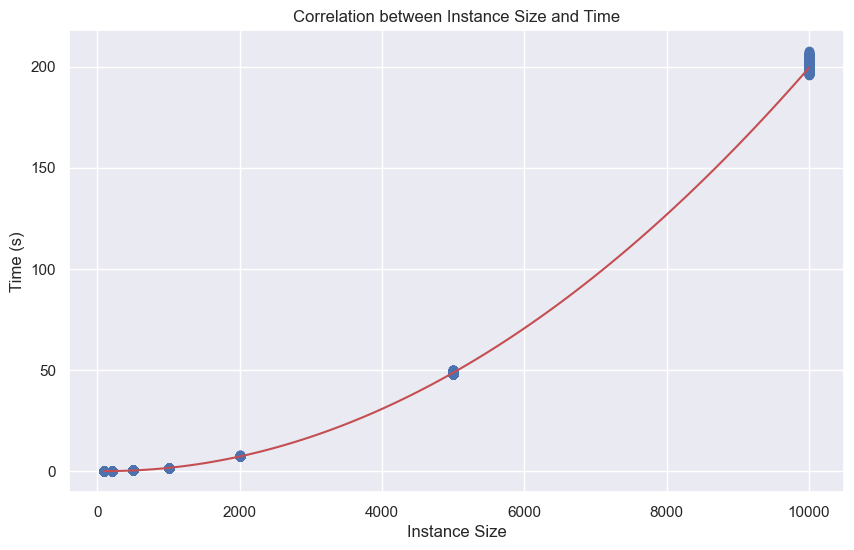

In [118]:
import numpy as np
from scipy.optimize import curve_fit

filtered_df = df[(df['algorithm'] == 'dynamic')]

filtered_df = filtered_df.groupby('instance_size').apply(remove_outliers).reset_index(drop=True)

def polynomial_func(x, a, b, c):
    return a * np.power(x, 2) + b * x + c

popt, _ = curve_fit(polynomial_func, filtered_df["instance_size"].astype(int), filtered_df["time"])

x_curve = np.linspace(filtered_df["instance_size"].astype(int).min(), filtered_df["instance_size"].astype(int).max(), 100)

y_curve = polynomial_func(x_curve, *popt)

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df["instance_size"].astype(int), filtered_df["time"])
plt.plot(x_curve, y_curve, 'r', label="Fitted Curve")
plt.title("Correlation between Instance Size and Time")
plt.xlabel("Instance Size")
plt.ylabel("Time (s)")
plt.show()

In [119]:
df

,file,algorithm,time,max_value,instance_size
368,knapPI_2_100_1000_1,greedy,0.000047,1487.0,100
236,knapPI_2_100_1000_1,greedy,0.000046,1487.0,100
110,knapPI_2_100_1000_1,greedy,0.000049,1487.0,100
518,knapPI_2_100_1000_1,greedy,0.000045,1487.0,100
242,knapPI_2_100_1000_1,greedy,0.000049,1487.0,100
...,...,...,...,...,...
3848,knapPI_1_10000_1000_1,dynamic,198.717094,563647.0,10000
4088,knapPI_1_10000_1000_1,dynamic,198.833804,563647.0,10000
3992,knapPI_1_10000_1000_1,dynamic,208.194942,563647.0,10000
3638,knapPI_1_10000_1000_1,dynamic,198.847918,563647.0,10000
